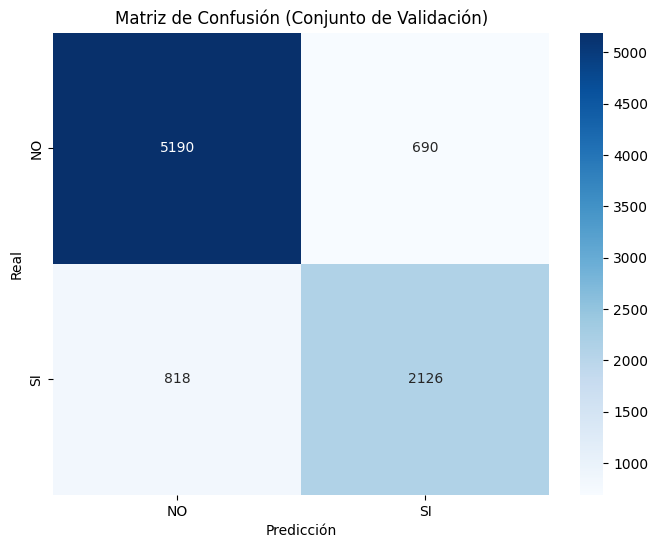

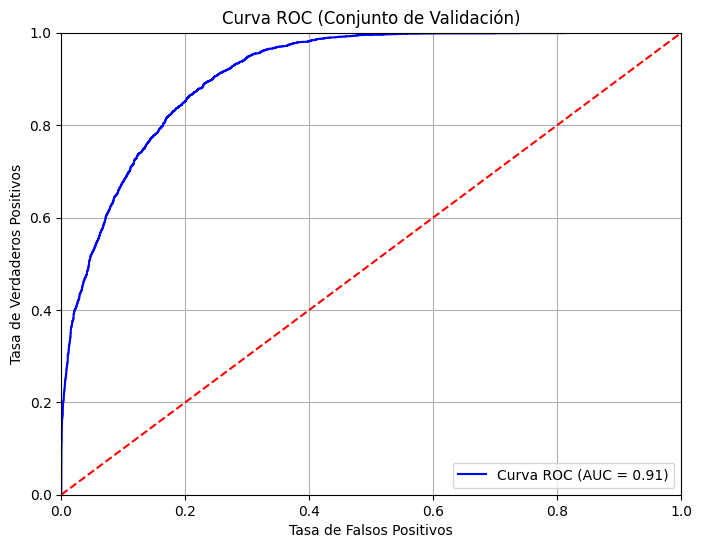

Predicciones guardadas en 'carsss_test_predictions.csv'.
Precisión en el conjunto de validación: 0.83
Reporte de Clasificación en el conjunto de validación:
              precision    recall  f1-score   support

          NO       0.86      0.88      0.87      5880
          SI       0.75      0.72      0.74      2944

    accuracy                           0.83      8824
   macro avg       0.81      0.80      0.81      8824
weighted avg       0.83      0.83      0.83      8824



In [9]:
import pandas as pd
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, 
    classification_report, 
    confusion_matrix, 
    roc_curve, 
    auc, 
    precision_recall_curve
)
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Cargar los archivos CSV de entrenamiento y test
df_train = pd.read_csv('cars_cleaned.csv', delimiter=',')
df_test = pd.read_csv('cars_input_cleaned.csv', delimiter=',')

# 2. Eliminar las columnas innecesarias del conjunto de entrenamiento
df_train = df_train.drop(columns=['CODE', 'PRODUCTO', 'TIPO_CARROCERIA', 'COMBUSTIBLE', 'EDAD_COCHE', 'Tiempo'])

# 3. Imputar valores faltantes
df_train.fillna("Missing", inplace=True)
df_test.fillna("Missing", inplace=True)

# 4. Identificar las columnas categóricas en el conjunto de entrenamiento
categorical_columns = df_train.select_dtypes(include=['object']).columns

# 5. Convertir columnas categóricas a numéricas en ambos datasets usando LabelEncoder
label_encoder = LabelEncoder()

for column in categorical_columns:
    df_train[column] = label_encoder.fit_transform(df_train[column])
    if column in df_test.columns:
        df_test[column] = df_test[column].apply(lambda x: x if x in label_encoder.classes_ else "Missing")
        df_test[column] = label_encoder.transform(df_test[column])

# 6. Separar las características (X) y la variable objetivo (y) en el conjunto de entrenamiento
X_train = df_train.drop(columns=['Mas_1_coche'])
y_train = df_train['Mas_1_coche']

# 7. Dividir el conjunto de entrenamiento en entrenamiento y validación
X_train_split, X_val, y_train_split, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# 8. Crear y entrenar el modelo XGBoost con los datos de entrenamiento
model = xgb.XGBClassifier()
model.fit(X_train_split, y_train_split)

# 9. Realizar predicciones en el conjunto de validación
y_val_pred = model.predict(X_val)

# 10. Calcular métricas de rendimiento
accuracy = accuracy_score(y_val, y_val_pred)
class_report = classification_report(y_val, y_val_pred, target_names=label_encoder.classes_)
conf_matrix = confusion_matrix(y_val, y_val_pred)

# 11. Calcular probabilidades para la curva ROC
y_val_proba = model.predict_proba(X_val)[:, 1]
fpr, tpr, _ = roc_curve(y_val, y_val_proba)
roc_auc = auc(fpr, tpr)

# 12. Graficar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=label_encoder.classes_, 
            yticklabels=label_encoder.classes_)
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión (Conjunto de Validación)')
plt.show()

# 13. Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Línea diagonal
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC (Conjunto de Validación)')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# 14. Realizar predicciones en el conjunto de test
X_test = df_test[X_train.columns]  # Asegurarse de que las columnas de test coincidan
y_test_pred = model.predict(X_test)

# 15. Guardar las predicciones junto con el conjunto de test original
df_test['Mas_1_coche'] = y_test_pred

# 16. Guardar el resultado en un archivo CSV
df_test.to_csv('carssss_test_predictions.csv', index=False)
print("Predicciones guardadas en 'carsss_test_predictions.csv'.")

# 17. Mostrar resultados
print(f"Precisión en el conjunto de validación: {accuracy:.2f}")
print("Reporte de Clasificación en el conjunto de validación:")
print(class_report)


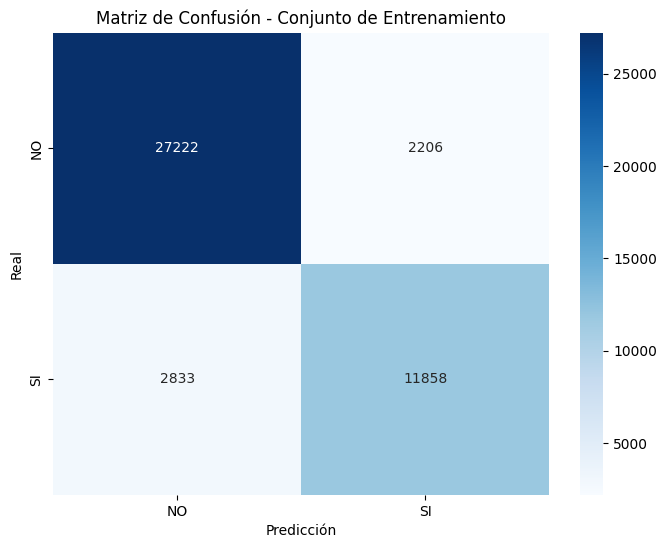

Predicciones guardadas en 'cars_test_predictions.csv'.
Precisión en el conjunto de entrenamiento: 0.89
Reporte de Clasificación en el conjunto de entrenamiento:
              precision    recall  f1-score   support

          NO       0.91      0.93      0.92     29428
          SI       0.84      0.81      0.82     14691

    accuracy                           0.89     44119
   macro avg       0.87      0.87      0.87     44119
weighted avg       0.88      0.89      0.89     44119



In [11]:
import pandas as pd
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import (
    accuracy_score, 
    classification_report, 
    confusion_matrix, 
    roc_curve, 
    auc, 
    precision_recall_curve
)
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Cargar los archivos CSV de entrenamiento y test
df_train = pd.read_csv('cars_cleaned.csv', delimiter=',')
df_test = pd.read_csv('cars_input_cleaned.csv', delimiter=',')

# 2. Eliminar las columnas innecesarias del conjunto de entrenamiento
df_train = df_train.drop(columns=['CODE', 'PRODUCTO', 'TIPO_CARROCERIA', 'COMBUSTIBLE', 'EDAD_COCHE', 'Tiempo'])

# 3. Imputar valores faltantes en ambos conjuntos de datos si es necesario
df_train.fillna("Missing", inplace=True)
df_test.fillna("Missing", inplace=True)

# 4. Identificar las columnas categóricas en el conjunto de entrenamiento
categorical_columns = df_train.select_dtypes(include=['object']).columns

# 5. Convertir columnas categóricas a numéricas en ambos datasets usando LabelEncoder
label_encoder = LabelEncoder()

for column in categorical_columns:
    df_train[column] = label_encoder.fit_transform(df_train[column])
    if column in df_test.columns:
        df_test[column] = df_test[column].apply(lambda x: x if x in label_encoder.classes_ else "Missing")
        df_test[column] = label_encoder.transform(df_test[column])

# 6. Separar las características (X) y la variable objetivo (y) en el conjunto de entrenamiento
X_train = df_train.drop(columns=['Mas_1_coche'])
y_train = df_train['Mas_1_coche']

# 7. Crear y entrenar el modelo XGBoost con los datos de entrenamiento
model = xgb.XGBClassifier()
model.fit(X_train, y_train)

# 8. Guardar el modelo entrenado en un archivo .pkl
with open('xgbb_model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)

# 9. Realizar predicciones en el conjunto de entrenamiento para evaluación
y_train_pred = model.predict(X_train)

# 10. Calcular métricas de rendimiento en el conjunto de entrenamiento
accuracy = accuracy_score(y_train, y_train_pred)
conf_matrix = confusion_matrix(y_train, y_train_pred)
class_report = classification_report(y_train, y_train_pred, target_names=label_encoder.classes_)

# 11. Graficar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=label_encoder.classes_, 
            yticklabels=label_encoder.classes_)
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión - Conjunto de Entrenamiento')
plt.show()

# 12. Cargar el modelo desde el archivo .pkl para el conjunto de prueba
with open('xgbb_model.pkl', 'rb') as model_file:
    loaded_model = pickle.load(model_file)

# 13. Asegurarse de que las columnas de test sean las mismas que las de entrenamiento
X_test = df_test[X_train.columns]  # Asegurarse de que las columnas de test coincidan

# 14. Realizar predicciones en el conjunto de test
y_test_pred = loaded_model.predict(X_test)

# 15. Guardar las predicciones junto con el conjunto de test original
df_test['Mas_1_coche'] = y_test_pred

# 16. Guardar el resultado en un archivo CSV
df_test.to_csv('cars3_test_predictions.csv', index=False)
print("Predicciones guardadas en 'cars_test_predictions.csv'.")
print(f"Precisión en el conjunto de entrenamiento: {accuracy:.2f}")
print("Reporte de Clasificación en el conjunto de entrenamiento:")
print(class_report)


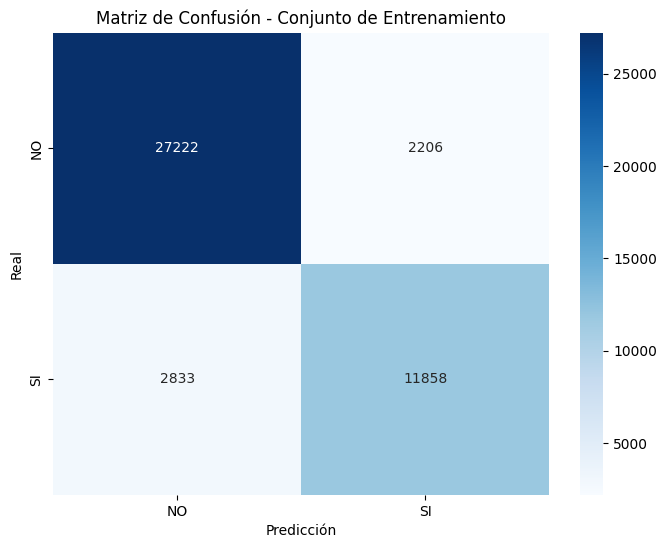

Predicciones guardadas en 'cars_test_predictions.csv'.
Precisión en el conjunto de entrenamiento: 0.89
Reporte de Clasificación en el conjunto de entrenamiento:
              precision    recall  f1-score   support

          NO       0.91      0.93      0.92     29428
          SI       0.84      0.81      0.82     14691

    accuracy                           0.89     44119
   macro avg       0.87      0.87      0.87     44119
weighted avg       0.88      0.89      0.89     44119



In [12]:
import pandas as pd
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import (
    accuracy_score, 
    classification_report, 
    confusion_matrix, 
    roc_curve, 
    auc, 
    precision_recall_curve
)
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Cargar los archivos CSV de entrenamiento y test
df_train = pd.read_csv('cars_cleaned.csv', delimiter=',')
df_test = pd.read_csv('cars_input_cleaned.csv', delimiter=',')

# 2. Eliminar las columnas innecesarias del conjunto de entrenamiento
df_train = df_train.drop(columns=['CODE', 'PRODUCTO', 'TIPO_CARROCERIA', 'COMBUSTIBLE', 'EDAD_COCHE', 'Tiempo'])

# 3. Imputar valores faltantes en ambos conjuntos de datos si es necesario
df_train.fillna("Missing", inplace=True)
df_test.fillna("Missing", inplace=True)

# 4. Identificar las columnas categóricas en el conjunto de entrenamiento
categorical_columns = df_train.select_dtypes(include=['object']).columns

# 5. Convertir columnas categóricas a numéricas en ambos datasets usando LabelEncoder
label_encoder = LabelEncoder()

for column in categorical_columns:
    df_train[column] = label_encoder.fit_transform(df_train[column])
    if column in df_test.columns:
        df_test[column] = df_test[column].apply(lambda x: x if x in label_encoder.classes_ else "Missing")
        df_test[column] = label_encoder.transform(df_test[column])

# 6. Separar las características (X) y la variable objetivo (y) en el conjunto de entrenamiento
X_train = df_train.drop(columns=['Mas_1_coche'])
y_train = df_train['Mas_1_coche']

# 7. Crear y entrenar el modelo XGBoost con los datos de entrenamiento
model = xgb.XGBClassifier()
model.fit(X_train, y_train)

# 8. Guardar el modelo entrenado en un archivo .pkl
with open('xgbc_model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)

# 9. Realizar predicciones en el conjunto de entrenamiento para evaluación
y_train_pred = model.predict(X_train)

# 10. Calcular métricas de rendimiento en el conjunto de entrenamiento
accuracy = accuracy_score(y_train, y_train_pred)
conf_matrix = confusion_matrix(y_train, y_train_pred)
class_report = classification_report(y_train, y_train_pred, target_names=label_encoder.classes_)

# 11. Graficar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=label_encoder.classes_, 
            yticklabels=label_encoder.classes_)
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión - Conjunto de Entrenamiento')
plt.show()

# 12. Cargar el modelo desde el archivo .pkl para el conjunto de prueba
with open('xgbc_model.pkl', 'rb') as model_file:
    loaded_model = pickle.load(model_file)

# 13. Asegurarse de que las columnas de test sean las mismas que las de entrenamiento
X_test = df_test[X_train.columns]  # Asegurarse de que las columnas de test coincidan

# 14. Realizar predicciones en el conjunto de test
y_test_pred = loaded_model.predict(X_test)

# 15. Guardar las predicciones junto con el conjunto de test original
df_test['Mas_1_coche'] = y_test_pred

# 16. Guardar el resultado en un archivo CSV
df_test.to_csv('cars4_test_predictions.csv', index=False)
print("Predicciones guardadas en 'cars_test_predictions.csv'.")
print(f"Precisión en el conjunto de entrenamiento: {accuracy:.2f}")
print("Reporte de Clasificación en el conjunto de entrenamiento:")
print(class_report)


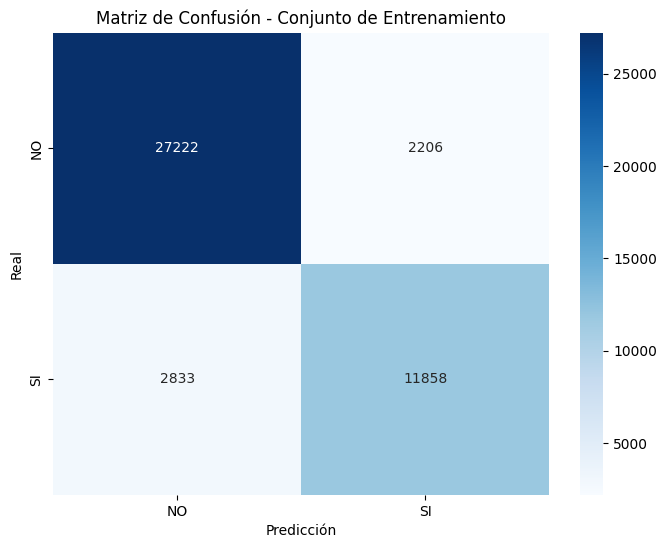

Predicciones guardadas en 'cars4_test_predictions.csv'.
Precisión en el conjunto de entrenamiento: 0.89
Reporte de Clasificación en el conjunto de entrenamiento:
              precision    recall  f1-score   support

          NO       0.91      0.93      0.92     29428
          SI       0.84      0.81      0.82     14691

    accuracy                           0.89     44119
   macro avg       0.87      0.87      0.87     44119
weighted avg       0.88      0.89      0.89     44119



In [15]:
import pandas as pd
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import (
    accuracy_score, 
    classification_report, 
    confusion_matrix
)
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Cargar los archivos CSV de entrenamiento y test
df_train = pd.read_csv('cars_cleaned.csv', delimiter=',')
df_test = pd.read_csv('cars_input_cleaned.csv', delimiter=',')

# 2. Eliminar las columnas innecesarias del conjunto de entrenamiento
df_train = df_train.drop(columns=['CODE', 'PRODUCTO', 'TIPO_CARROCERIA', 'COMBUSTIBLE', 'EDAD_COCHE', 'Tiempo'])

# 3. Imputar valores faltantes en ambos conjuntos de datos si es necesario
df_train.fillna("Missing", inplace=True)
df_test.fillna("Missing", inplace=True)

# 4. Identificar las columnas categóricas en el conjunto de entrenamiento
categorical_columns = df_train.select_dtypes(include=['object']).columns

# 5. Convertir columnas categóricas a numéricas en ambos datasets usando LabelEncoder
label_encoder = LabelEncoder()

for column in categorical_columns:
    df_train[column] = label_encoder.fit_transform(df_train[column])
    if column in df_test.columns:
        df_test[column] = df_test[column].apply(lambda x: x if x in label_encoder.classes_ else "Missing")
        df_test[column] = label_encoder.transform(df_test[column])

# 6. Separar las características (X) y la variable objetivo (y) en el conjunto de entrenamiento
X_train = df_train.drop(columns=['Mas_1_coche'])
y_train = df_train['Mas_1_coche']

# 7. Crear y entrenar el modelo XGBoost con los datos de entrenamiento
model = xgb.XGBClassifier()
model.fit(X_train, y_train)

# 8. Guardar el modelo entrenado en un archivo .pkl
with open('xgbcq_model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)

# 9. Realizar predicciones en el conjunto de entrenamiento
y_train_pred = model.predict(X_train)

# 10. Calcular métricas de rendimiento en el conjunto de entrenamiento
accuracy_train = accuracy_score(y_train, y_train_pred)
conf_matrix_train = confusion_matrix(y_train, y_train_pred)
class_report_train = classification_report(y_train, y_train_pred, target_names=label_encoder.classes_)

# 11. Graficar la matriz de confusión para el conjunto de entrenamiento
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_train, annot=True, fmt='d', cmap='Blues', 
            xticklabels=label_encoder.classes_, 
            yticklabels=label_encoder.classes_)
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión - Conjunto de Entrenamiento')
plt.show()

# 12. Cargar el modelo desde el archivo .pkl para el conjunto de prueba
with open('xgbcq_model.pkl', 'rb') as model_file:
    loaded_model = pickle.load(model_file)

# 13. Asegurarse de que las columnas de test sean las mismas que las de entrenamiento
X_test = df_test[X_train.columns]  # Asegurarse de que las columnas de test coincidan

# 14. Realizar predicciones en el conjunto de test
y_test_pred = loaded_model.predict(X_test)

# 15. Guardar las predicciones junto con el conjunto de test original
df_test['Mas_1_coche'] = y_test_pred

# 16. Guardar el resultado en un archivo CSV
df_test.to_csv('cars4q_test_predictions.csv', index=False)
print("Predicciones guardadas en 'cars4_test_predictions.csv'.")
print(f"Precisión en el conjunto de entrenamiento: {accuracy_train:.2f}")
print("Reporte de Clasificación en el conjunto de entrenamiento:")
print(class_report_train)


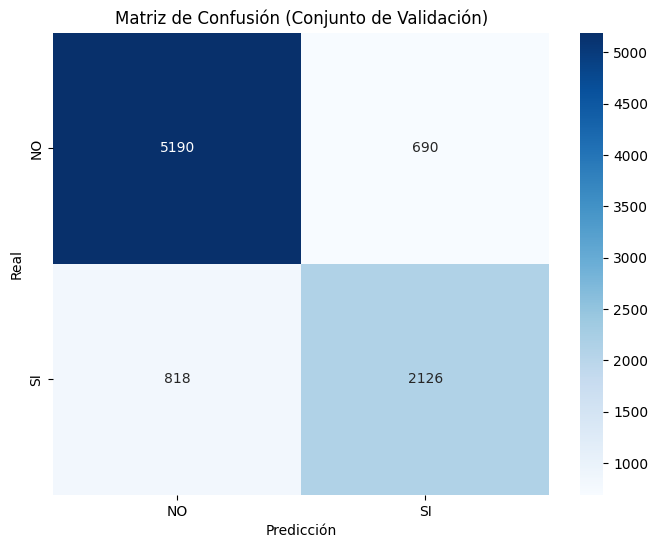

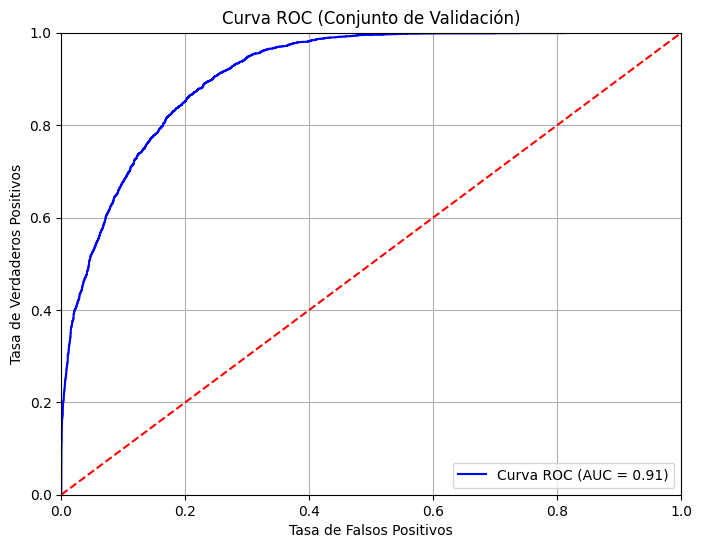

Predicciones guardadas en 'carsss_test_predictions.csv'.
Precisión en el conjunto de validación: 0.83
Reporte de Clasificación en el conjunto de validación:
              precision    recall  f1-score   support

          NO       0.86      0.88      0.87      5880
          SI       0.75      0.72      0.74      2944

    accuracy                           0.83      8824
   macro avg       0.81      0.80      0.81      8824
weighted avg       0.83      0.83      0.83      8824



In [19]:
import pandas as pd
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, 
    classification_report, 
    confusion_matrix, 
    roc_curve, 
    auc, 
    precision_recall_curve
)
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Cargar los archivos CSV de entrenamiento y test
df_train = pd.read_csv('cars_cleaned.csv', delimiter=',')
df_test = pd.read_csv('cars_input_cleaned.csv', delimiter=',')

# 2. Eliminar las columnas innecesarias del conjunto de entrenamiento
df_train = df_train.drop(columns=['CODE', 'PRODUCTO', 'TIPO_CARROCERIA', 'COMBUSTIBLE', 'EDAD_COCHE', 'Tiempo'])

# 3. Imputar valores faltantes
df_train.fillna("Missing", inplace=True)
df_test.fillna("Missing", inplace=True)

# 4. Identificar las columnas categóricas en el conjunto de entrenamiento
categorical_columns = df_train.select_dtypes(include=['object']).columns

# 5. Convertir columnas categóricas a numéricas en ambos datasets usando LabelEncoder
label_encoder = LabelEncoder()

for column in categorical_columns:
    df_train[column] = label_encoder.fit_transform(df_train[column])
    if column in df_test.columns:
        df_test[column] = df_test[column].apply(lambda x: x if x in label_encoder.classes_ else "Missing")
        df_test[column] = label_encoder.transform(df_test[column])

# 6. Separar las características (X) y la variable objetivo (y) en el conjunto de entrenamiento
X_train = df_train.drop(columns=['Mas_1_coche'])
y_train = df_train['Mas_1_coche']

# 7. Dividir el conjunto de entrenamiento en entrenamiento y validación
X_train_split, X_val, y_train_split, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# 8. Crear y entrenar el modelo XGBoost con los datos de entrenamiento
model = xgb.XGBClassifier()
model.fit(X_train_split, y_train_split)

# 9. Guardar el modelo entrenado en un archivo .pkl
with open('xgb_model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)

# 10. Cargar el modelo desde el archivo .pkl
with open('xgb_model.pkl', 'rb') as model_file:
    loaded_model = pickle.load(model_file)

# 11. Realizar predicciones en el conjunto de validación con el modelo cargado
y_val_pred = loaded_model.predict(X_val)

# 12. Calcular métricas de rendimiento
accuracy = accuracy_score(y_val, y_val_pred)
class_report = classification_report(y_val, y_val_pred, target_names=label_encoder.classes_)
conf_matrix = confusion_matrix(y_val, y_val_pred)

# 13. Calcular probabilidades para la curva ROC
y_val_proba = loaded_model.predict_proba(X_val)[:, 1]
fpr, tpr, _ = roc_curve(y_val, y_val_proba)
roc_auc = auc(fpr, tpr)

# 14. Graficar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=label_encoder.classes_, 
            yticklabels=label_encoder.classes_)
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión (Conjunto de Validación)')
plt.show()

# 15. Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Línea diagonal
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC (Conjunto de Validación)')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# 16. Asegurarse de que las columnas de test sean las mismas que las de entrenamiento
X_test = df_test[X_train.columns]

# 17. Realizar predicciones en el conjunto de test con el modelo cargado
y_test_pred = loaded_model.predict(X_test)

# 18. Guardar las predicciones junto con el conjunto de test original
df_test['Mas_1_coche'] = y_test_pred

# 19. Guardar el resultado en un archivo CSV
df_test.to_csv('cars_test_pred_mod.csv', index=False)
print("Predicciones guardadas en 'carsss_test_predictions.csv'.")

# 20. Mostrar resultados del conjunto de validación
print(f"Precisión en el conjunto de validación: {accuracy:.2f}")
print("Reporte de Clasificación en el conjunto de validación:")
print(class_report)


Cargar los archivos CSV de entrenamiento y prueba: Se cargan dos conjuntos de datos. El conjunto de datos de entrenamiento se utiliza para construir el modelo, mientras que el conjunto de prueba se utiliza para hacer predicciones una vez que el modelo esté entrenado.

Eliminar columnas innecesarias: Se eliminan columnas que no son relevantes para el modelo o que no proporcionan información útil para el proceso de predicción.

Imputar valores faltantes: Si existen valores faltantes en las columnas, se rellenan con la palabra "Missing" tanto en el conjunto de datos de entrenamiento como en el de prueba. Esto asegura que no haya valores nulos que puedan causar problemas al entrenar el modelo o hacer predicciones.

Identificar las columnas categóricas: Aquí se seleccionan las columnas que contienen valores categóricos, que suelen ser de tipo "objeto" (strings). Es importante identificar estas columnas para poder convertirlas en valores numéricos que el modelo pueda entender.

Convertir columnas categóricas a numéricas: Utilizando LabelEncoder, las columnas categóricas en ambos conjuntos de datos (entrenamiento y prueba) se convierten a valores numéricos. Esto es esencial, ya que los modelos de machine learning no pueden manejar directamente datos categóricos (strings).

Separar las características (X) y la variable objetivo (y): Se separan las características (columnas que se usarán como entrada para el modelo) y la variable objetivo o etiqueta (la columna que se quiere predecir, en este caso Mas_1_coche). El conjunto de características se denomina X_train y la variable objetivo y_train.

Dividir el conjunto de entrenamiento en entrenamiento y validación: Se divide el conjunto de entrenamiento en dos partes, un conjunto de entrenamiento y un conjunto de validación. El conjunto de validación se utiliza para evaluar el rendimiento del modelo durante su entrenamiento y evitar sobreajuste. El modelo será entrenado con una porción de los datos, y su rendimiento será validado con la otra porción. Esto garantiza que el modelo generalice bien en datos que no ha visto antes.

Crear y entrenar el modelo XGBoost: Se crea un modelo usando el algoritmo XGBoost (una técnica avanzada de boosting) y se entrena con el conjunto de entrenamiento. El modelo intenta aprender las relaciones entre las características y la variable objetivo.

Realizar predicciones en el conjunto de validación: Una vez entrenado el modelo, se hacen predicciones en el conjunto de validación. Estas predicciones se comparan con los valores reales de la variable objetivo para evaluar qué tan bien está funcionando el modelo.

Calcular métricas de rendimiento: Se calcula la precisión (accuracy), el reporte de clasificación (classification report, que incluye métricas como precisión, recall, y F1-score), y la matriz de confusión para medir el rendimiento del modelo en el conjunto de validación. La matriz de confusión muestra cuántas predicciones fueron correctas o incorrectas.

Calcular probabilidades para la curva ROC: Además de predecir clases, el modelo también puede predecir probabilidades. Estas probabilidades se usan para calcular la curva ROC (Receiver Operating Characteristic) y el AUC (Area Under the Curve). Esto ayuda a medir el rendimiento del modelo en términos de su capacidad para distinguir entre clases.

Graficar la matriz de confusión: Se crea una visualización de la matriz de confusión para ver de manera clara cuántas predicciones fueron correctas o incorrectas. Es una forma útil de entender dónde el modelo está fallando.

Graficar la curva ROC: La curva ROC se grafica para ver el trade-off entre la tasa de verdaderos positivos y la tasa de falsos positivos. Un AUC cercano a 1 indica que el modelo tiene un buen rendimiento en la clasificación.

Realizar predicciones en el conjunto de prueba: Una vez validado el modelo, se utiliza para hacer predicciones en el conjunto de prueba, es decir, el conjunto de datos que no se usó ni para entrenar ni para validar el modelo.

Guardar las predicciones junto con el conjunto de prueba original: Las predicciones para el conjunto de prueba se añaden como una nueva columna al archivo CSV original y se guardan para análisis o uso posterior.

Guardar el resultado en un archivo CSV: Finalmente, se guarda el conjunto de datos con las predicciones en un archivo CSV.

Mostrar resultados: Se muestra la precisión del modelo en el conjunto de validación y se imprime el reporte de clasificación completo, lo que permite analizar las métricas clave del rendimiento del modelo.

Esta explicación abarca cada paso del código y su propósito. Sobre tu duda de si el conjunto de validación debe ser el de prueba: no son lo mismo. El conjunto de validación es una parte del conjunto de entrenamiento que se usa para evaluar el rendimiento del modelo mientras se ajusta, mientras que el conjunto de prueba se utiliza solo al final para ver qué tan bien generaliza el modelo en datos completamente nuevos que no se han usado durante el entrenamiento.